# Explanation of SNR



# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle




## Import custom functions for running SSFM

In [2]:
from ssfm_functions import *


## Initialize timebase

In [3]:
N  = 2**10 #Number of points
dt = 0.2e-12 #Time resolution [s] 

timeFreq_test=timeFreq_class(N,dt,193e12)
binWidth_GHz = timeFreq_test.freq_step/1e9


 ### timeFreq Configuration Parameters ###
  Number of points 		= 1024
  Start time, tmin 		= -102.400ps
  Stop time, tmax 		= 102.400ps
  Time resolution 		= 0.200ps
  
  Center frequency		= 193.000THz
  Start frequency		= -2.498THz
  Stop frequency 		= 2.493THz
  Frequency resolution 		= 4878.044MHz
   


## Initialize "clean" Gaussian pulse and noisy Gaussian pulse

 ### Input Signal Parameters ###
  Pmax 				= 1.000 W
  Duration 			= 20.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.000 sqrt(W)
   
 ### Input Signal Parameters ###
  Pmax 				= 0.001 W
  Duration 			= 20.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= custom
  order 			= 1
  noiseAmplitude 		= 0.010 sqrt(W)
   


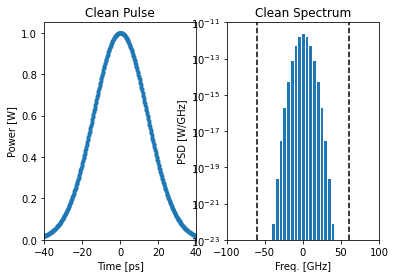

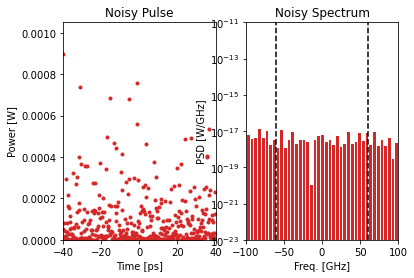

In [4]:
channelBandwidth_GHz = 120 #Full width of channel


#Initialize Gaussian pulse with no noise


cleanAmplitude = 1                    #Amplitude in units of sqrt(W)
cleanDuration  =20e-12    #Pulse 1/e^2 duration [s]
cleanOffset    = 0                             #Time offset
cleanChirp = 0                                 #Chirp factor
cleanCarrierFreq=0                             #Freq. offset
cleanPulseType='gaussian'                      #'Gaussian', 'square', 'sech'
cleanOrder = 1                                 #Order of Gaussian pulse
cleanNoiseAmplitude = 0.0                      #Added ASE noise amplitude


cleanInputSignal = input_signal_class(timeFreq_test, 
                                     cleanAmplitude ,
                                     cleanDuration,
                                     cleanOffset,
                                     cleanChirp,
                                     cleanCarrierFreq,
                                     cleanPulseType,
                                     cleanOrder,
                                     cleanNoiseAmplitude)


#Initialize pure ASE noise
noiseDuration  =cleanDuration    #Pulse 1/e^2 duration [s]
noiseOffset    = cleanOffset                             #Time offset
noiseChirp = cleanChirp                                 #Chirp factor
noiseCarrierFreq=cleanCarrierFreq                             #Freq. offset
noisePulseType='custom'                     #'Gaussian', 'square', 'sech'
noiseOrder = cleanOrder                                 #Order of Gaussian pulse
noiseAmplitude = cleanAmplitude* 10e-3                     #Added ASE noise amplitude

noiseInputSignal = input_signal_class(timeFreq_test, 
                                     0.0 ,
                                     noiseDuration,
                                     noiseOffset,
                                     noiseChirp,
                                     noiseCarrierFreq,
                                     noisePulseType,
                                     noiseOrder,
                                     noiseAmplitude,FFT_tol=1e-3)







fig,ax=plt.subplots(1,2)
ax[0].set_title("Clean Pulse")
ax[0].plot(cleanInputSignal.timeFreq.t*1e12,getPower(cleanInputSignal.amplitude),'.',color='C0')
ax[0].set_xlim(-2*cleanDuration*1e12,2*cleanDuration*1e12)
ax[0].set_ylim(0,cleanAmplitude**2*1.05)
ax[0].set_xlabel("Time [ps]")
ax[0].set_ylabel("Power [W]")

ax[1].set_title("Clean Spectrum")
ax[1].bar(cleanInputSignal.timeFreq.f/1e9,getPower(cleanInputSignal.spectrum)*1e9,width=binWidth_GHz,edgecolor='white')

ax[1].axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
ax[1].axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')


ax[1].set_xlim(-100,100)
ax[1].set_ylim(1e-32*1e9,1e-20*1e9)
ax[1].set_yscale('log')
ax[1].set_xlabel("Freq. [GHz]")
ax[1].set_ylabel("PSD [W/GHz]")
plt.show()

fig,ax=plt.subplots(1,2)
ax[0].set_title("Noisy Pulse")
ax[0].plot(cleanInputSignal.timeFreq.t*1e12,getPower(noiseInputSignal.amplitude),'.',color='tab:red')
ax[0].set_xlim(-2*cleanDuration*1e12,2*cleanDuration*1e12)
ax[0].set_ylim(0,cleanAmplitude**2*1.05/1000)
ax[0].set_xlabel("Time [ps]")
ax[0].set_ylabel("Power [W]")

ax[1].set_title("Noisy Spectrum")
ax[1].bar(cleanInputSignal.timeFreq.f/1e9,
          getPower(noiseInputSignal.spectrum)*1e9,
          facecolor='tab:red',
          width=binWidth_GHz,
          edgecolor='white')

ax[1].axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
ax[1].axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')

ax[1].set_xlim(-100,100)
ax[1].set_ylim(1e-32*1e9,1e-20*1e9)
ax[1].set_yscale('log')
ax[1].set_xlabel("Freq. [GHz]")
ax[1].set_ylabel("PSD [W/GHz]")
plt.show()





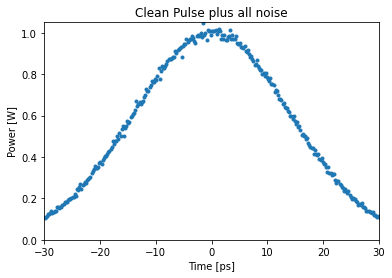

In [5]:
#Show clean pulse + noise
fig,ax=plt.subplots()
ax.set_title("Clean Pulse plus all noise")
ax.plot(cleanInputSignal.timeFreq.t*1e12,getPower(cleanInputSignal.amplitude+noiseInputSignal.amplitude),'.')
ax.set_xlim(-30,30)
ax.set_ylim(0,cleanAmplitude**2*1.05)
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Power [W]")
plt.show()




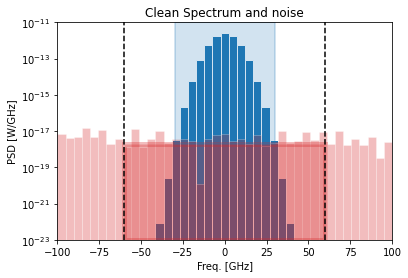

In [6]:
#Show clean spectrum AND noise

fig,ax = plt.subplots()
ax.set_title("Clean Spectrum and noise")
ax.bar(cleanInputSignal.timeFreq.f/1e9,getPower(cleanInputSignal.spectrum)*1e9,facecolor='C0',alpha=1.0,width=binWidth_GHz,edgecolor='white')
ax.bar(cleanInputSignal.timeFreq.f/1e9,getPower(noiseInputSignal.spectrum)*1e9,facecolor='tab:red',alpha=0.3,width=binWidth_GHz,edgecolor='white')

ax.axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
ax.axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')

rect1 = Rectangle((-channelBandwidth_GHz/2,1e-23), channelBandwidth_GHz, 2e-18-1e-23, facecolor='tab:red', fc = 'tab:red',alpha=0.3,lw = 5,edgecolor='tab:red')
rect2 = Rectangle((-30,2e-18), 60, 1e-11-2e-18, color='tab:blue', fc = 'tab:blue',alpha=0.2,lw = 2)

ax.add_patch(rect1)
ax.add_patch(rect2)

ax.set_xlim(-100,100)
ax.set_ylim(1e-32*1e9,1e-20*1e9)
ax.set_yscale('log')
ax.set_xlabel("Freq. [GHz]")
ax.set_ylabel("PSD [W/GHz]")
plt.show()

4.878044128417969


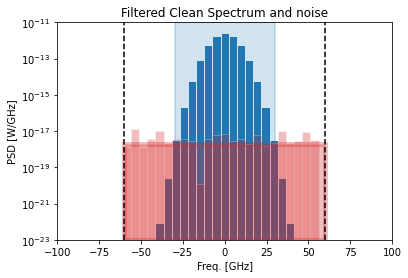

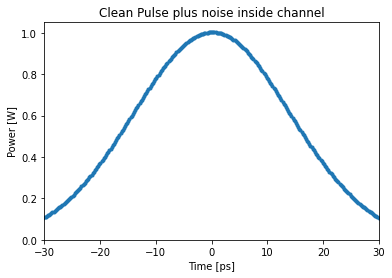

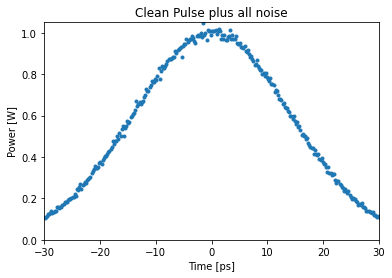

In [8]:
#Filter out frequencies inside the channel (between black lines)

filtered_signal_spectrum=1.0*np.zeros_like(cleanInputSignal.spectrum)
filtered_noise_spectrum=1.0*np.copy(filtered_signal_spectrum)

print(cleanInputSignal.timeFreq.freq_step/1e9)
N_BW=int(60/(cleanInputSignal.timeFreq.freq_step/1e9) )
Nmin=int(len(filtered_signal_spectrum)/2)-N_BW
Nmax=int(len(filtered_signal_spectrum)/2)+N_BW

filtered_signal_spectrum[Nmin:Nmax]=cleanInputSignal.spectrum[Nmin:Nmax]
filtered_noise_spectrum[Nmin:Nmax]=noiseInputSignal.spectrum[Nmin:Nmax]



fig,ax = plt.subplots()
ax.set_title("Filtered Clean Spectrum and noise")
ax.bar(cleanInputSignal.timeFreq.f/1e9,getPower(filtered_signal_spectrum)*1e9,facecolor='C0',alpha=1.0,width=binWidth_GHz,edgecolor='white')
ax.bar(cleanInputSignal.timeFreq.f/1e9,getPower(filtered_noise_spectrum)*1e9,facecolor='tab:red',alpha=0.3,width=binWidth_GHz,edgecolor='white')

ax.axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
ax.axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')

rect1 = Rectangle((-channelBandwidth_GHz/2,1e-23), channelBandwidth_GHz, 2e-18-1e-23, facecolor='tab:red', fc = 'tab:red',alpha=0.3,lw = 5,edgecolor='tab:red')
rect2 = Rectangle((-30,2e-18), 60, 1e-11-2e-18, color='tab:blue', fc = 'tab:blue',alpha=0.2,lw = 2)

ax.add_patch(rect1)
ax.add_patch(rect2)

ax.set_xlim(-100,100)
ax.set_ylim(1e-32*1e9,1e-20*1e9)
ax.set_yscale('log')
ax.set_xlabel("Freq. [GHz]")
ax.set_ylabel("PSD [W/GHz]")
plt.show()

#Get time domain signal when filtered signal and noise are added together
noisy_pulse=getPulseFromSpectrum(cleanInputSignal.timeFreq.f,filtered_signal_spectrum+filtered_noise_spectrum,FFT_tol=1e-3)

fig,ax=plt.subplots()
ax.set_title("Clean Pulse plus noise inside channel")
ax.plot(cleanInputSignal.timeFreq.t*1e12,getPower(noisy_pulse),'.')
ax.set_xlim(-30,30)
ax.set_ylim(0,cleanAmplitude**2*1.05)
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Power [W]")
plt.show()

fig,ax=plt.subplots()
ax.set_title("Clean Pulse plus all noise")
ax.plot(cleanInputSignal.timeFreq.t*1e12,getPower(cleanInputSignal.amplitude+noiseInputSignal.amplitude),'.')
ax.set_xlim(-30,30)
ax.set_ylim(0,cleanAmplitude**2*1.05)
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Power [W]")
plt.show()

The total noise power can be found by integrating over all the red datapoints. The total signal power can be found by integrating all the blue datapoints. 

## BUT

in actual measurements of noise optical pulses, we cannot directly separate signal and noise like above!


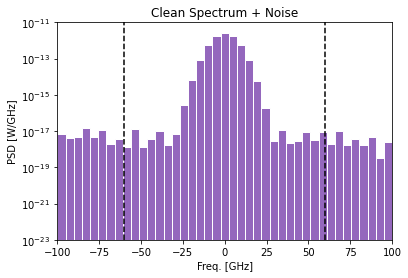

In [9]:
#Show clean spectrum PLUS noise

fig,ax = plt.subplots()
ax.set_title("Clean Spectrum + Noise")
ax.bar(cleanInputSignal.timeFreq.f/1e9,getPower(cleanInputSignal.spectrum+noiseInputSignal.spectrum)*1e9,edgecolor='white',width=binWidth_GHz,facecolor='tab:purple')

ax.axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
ax.axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')

ax.set_xlim(-100,100)
ax.set_ylim(1e-32*1e9,1e-20*1e9)
ax.set_yscale('log')
ax.set_xlabel("Freq. [GHz]")
ax.set_ylabel("PSD [W/GHz]")
plt.show()

### QUESTION: How to compute the SNR from the "combined" data?
The graph above shows typical measurement data from an OSA; Signal and noise at detected simultanelously, so we cannot easily separate them directly! 

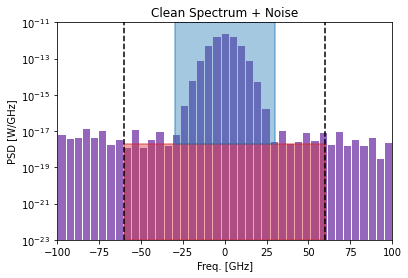

In [10]:
#
fig,ax = plt.subplots()
ax.set_title("Clean Spectrum + Noise")
combinedSignal=cleanInputSignal.spectrum+noiseInputSignal.spectrum
ax.bar(cleanInputSignal.timeFreq.f/1e9,getPower(combinedSignal)*1e9,edgecolor='white',
       width=binWidth_GHz,facecolor='tab:purple')

ax.axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
ax.axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')

rect1 = Rectangle((-channelBandwidth_GHz/2,1e-23), channelBandwidth_GHz, 2e-18-1e-23, color='tab:red', fc = 'tab:red',alpha=0.4,lw = 2)
rect2 = Rectangle((-30,2e-18), 60, 1e-11-2e-18, color='tab:blue', fc = 'tab:blue',alpha=0.4,lw = 2)

ax.add_patch(rect1)
ax.add_patch(rect2)

ax.set_xlim(-100,100)
ax.set_ylim(1e-32*1e9,1e-20*1e9)
ax.set_yscale('log')
ax.set_xlabel("Freq. [GHz]")
ax.set_ylabel("PSD [W/GHz]")
plt.show()

To calculate the total noise power, we assume that the noise PSD outside the range of the signal (blue square) is representative of the noise inside the 


$P_{\text{Noise}}\approx\text{PSD}_{\text{Noise}}\cdot\text{BW}_{\text{ch}} = 2\cdot10^{-18} \text{W}/\text{GHz} \cdot 120 \text{GHz} =2.40\cdot10^{-16}\text{W}$

$P_{\text{Signal}}\approx\int_{a}^{b}\text{PSD}_{\text{Signal}} d\text{f} = \int_{-30 \text{GHz}}^{30 \text{GHz}}\text{PSD}_{\text{Signal}} d\text{f}   $

For a 120GHz channel bandwidth:
 
P_signal = 3.5515318226406225e-11W, P_noise = 2.4e-16W
SNR_lin = 147980.49261002595 , SNR_dB = 51.70204468704409dB 


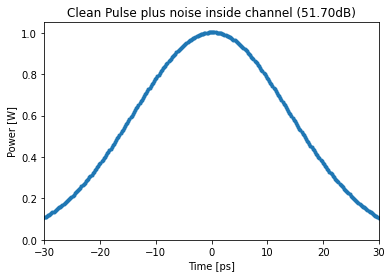

In [11]:
print("For a 120GHz channel bandwidth:")
print(' ')
P_noise = 2e-18*channelBandwidth_GHz
P_signal = np.trapz( getPower(combinedSignal[int(1024/2-6):int(1024/2+6)]),timeFreq_test.f[int(1024/2-6):int(1024/2+6)])
print(f"P_signal = {P_signal}W, P_noise = {P_noise}W")
SNR_lin_channel = P_signal/(P_noise)
SNR_dB_channel=10*np.log10(SNR_lin_channel)
print(f"SNR_lin = {SNR_lin_channel} , SNR_dB = {SNR_dB_channel}dB " )

fig,ax=plt.subplots()
ax.set_title(f"Clean Pulse plus noise inside channel ({SNR_dB_channel:.2f}dB)")
ax.plot(cleanInputSignal.timeFreq.t*1e12,getPower(noisy_pulse),'.')
ax.set_xlim(-30,30)
ax.set_ylim(0,cleanAmplitude**2*1.05)
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Power [W]")
plt.show()



What if we did not filter out the +/-60 GHz range but instead used the full 5THz?
 
P_signal = 3.5515318226406225e-11W, P_noise = 9.980478286743361e-15W
SNR_lin = 3558.4785824923533 , SNR_dB = 35.5126435627131dB 


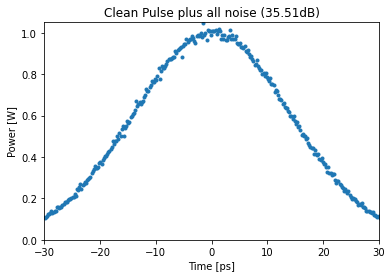

 
Difference in SNR =16.189401124330992dB 


In [12]:
print("What if we did not filter out the +/-60 GHz range but instead used the full 5THz?")
print(' ')
P_noise = 2e-18*(timeFreq_test.fmax-timeFreq_test.fmin)/1e9
P_signal = np.trapz( getPower(combinedSignal[int(1024/2-6):int(1024/2+6)]),timeFreq_test.f[int(1024/2-6):int(1024/2+6)])
print(f"P_signal = {P_signal}W, P_noise = {P_noise}W")
SNR_lin_full = P_signal/(P_noise)
SNR_dB_full=10*np.log10(SNR_lin_full)
print(f"SNR_lin = {SNR_lin_full} , SNR_dB = {SNR_dB_full}dB " )

fig,ax=plt.subplots()
ax.set_title(f"Clean Pulse plus all noise ({SNR_dB_full:.2f}dB)")
ax.plot(cleanInputSignal.timeFreq.t*1e12,getPower(cleanInputSignal.amplitude+noiseInputSignal.amplitude),'.')
ax.set_xlim(-30,30)
ax.set_ylim(0,cleanAmplitude**2*1.05)
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Power [W]")
plt.show()

print(' ')
print(f'Difference in SNR ={SNR_dB_channel-SNR_dB_full}dB ')



# IMPORTANT NOTE!
The SNR of the detected signal will always depend on the bandwidth of the channel (distance between vertical dashed lines or "frequency width" of the red box). All else being equal, higher channel bandwidth picks up more noise and reduces SNR. 



# Question:

A lower SNR value implies a more noisy signal, which increases the risk that data will not be transmitted correctly. For example, a 0 might be interpreted as a 1 by mistake.

But for a given SNR value, what is the exact risk that a symbol will be misinterpreted?

The answer depends on which **"modulation scheme"** you use!

So what is a "modulation scheme"?

Let's first see an experimental setup we could use for doing "4QAM":

![title](QAM_setup.png)

Here is the voltage signal measured at the photodiode when the arriving pulses interfere with the reference laser **in the ideal case with zero noise**:
![title](QAM_phase.png)



Because noise causes fluctuations in the detected power and the measured phase, we can use polar coordinates to draw a dot corresponding to each received pulse:
![title](ConstellationDiagram.png)

# NOTE:

$SNR = \frac{P_{sig}}{P_{noise}} = \frac{A^2}{\sigma^2}$

The probability distribution for the received datapoints corresponding to 00 is:

$$ \rho_{00}(I,Q) = \frac{1}{2\pi\sigma^2} \exp\left( \frac{\left(I- \frac{A}{\sqrt{2}} \right)^2}{2\sigma^2} \right) \exp\left( \frac{\left(Q- \frac{A}{\sqrt{2}} \right)^2}{2\sigma^2} \right) $$

Thus, the "**Symbol Error Rate**" (SER) must be the probability of NOT landing in the 1st quadrant: 

$$ SER = 1- \int\int_{\text{1st quadrant}} \rho_{00}(I,Q) dIdQ $$

Computing the integral using appropriate bounds and the anti-derivative of the Gaussian (the "error function" https://en.wikipedia.org/wiki/Error_function), it can be shown that:

$$ SER = 1-\frac{1}{4}\left[1+erf\left( \frac{\sqrt{SNR}}{2} \right)\right]^2 $$

The "Bit error rate" (BER) is simply
$$ BER = \text{Number of bits per symbol}\cdot SER. $$

Reporting the "error risk" in terms of BER rather than SER makes it easier to compare the performance of different modulation schemes. Since 4QAM with 2x2 constellation points has 2 bits per symbol and 16QAM with 4x4 constellation points has 4 bits per symbol, making one symbol error with 16QAM leads to 4 erroneous bits, while one error with 4QAM only leads to 2 incorrects bits.  


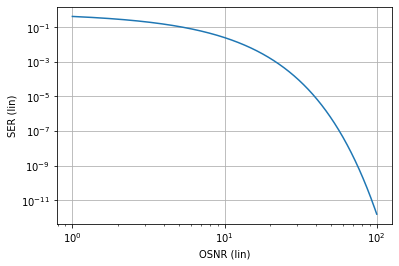

In [13]:
from scipy.special import erf

def SER(OSNR_lin):
    return 1-0.25*(1+erf(np.sqrt(OSNR_lin)/2))**2

OSNR_list=np.logspace(0,2,1000)

fig,ax=plt.subplots()
ax.plot(OSNR_list,SER(OSNR_list))
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('OSNR (lin)')
ax.set_ylabel('SER (lin)')
ax.grid()
plt.show()

In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
np.random.seed(123)


In [16]:
phaseNoise=np.exp(1j*np.random.uniform(-np.pi,np.pi,Nmax-Nmin+1))

def series(A_sqrt_W,sigma_sqrt_W):
    
    fig,ax=plt.subplots(1,3,dpi=115)
    fig.tight_layout()
    Circle1=plt.Circle((A_sqrt_W,A_sqrt_W), radius=sigma_sqrt_W, color='tab:green')
    Circle2=plt.Circle((-A_sqrt_W,A_sqrt_W), radius=sigma_sqrt_W, color='tab:green')
    Circle3=plt.Circle((A_sqrt_W,-A_sqrt_W), radius=sigma_sqrt_W, color='tab:green')
    Circle4=plt.Circle((-A_sqrt_W,-A_sqrt_W), radius=sigma_sqrt_W, color='tab:green')
    
    ax[0].add_patch(Circle1)
    ax[0].add_patch(Circle2)
    ax[0].add_patch(Circle3)
    ax[0].add_patch(Circle4)
    
    ax[0].axvline(x=0,color="tab:red")
    ax[0].axhline(y=0,color="tab:red")
    OSNR_lin=A_sqrt_W**2/sigma_sqrt_W**2
    ax[0].set_title(f"OSNR={10*np.log10(OSNR_lin):.2f}dB,\n SER = {SER(OSNR_lin):.3E}")
    ax[0].set_xlim(-5,5)
    ax[0].set_ylim(-5,5)
    ax[0].set_aspect('equal', adjustable='box')
    ax[0].plot([0,A_sqrt_W],[0,A_sqrt_W],'k-')
    ax[0].grid()
    
    
    PSD_noise_Js=sigma_sqrt_W**2/(channelBandwidth_GHz*1e9*binWidth_GHz*1e9)
    
  
    

          
    cleanInputSignal_2 = input_signal_class(timeFreq_test, 
                                     A_sqrt_W ,
                                     cleanDuration,
                                     cleanOffset,
                                     cleanChirp,
                                     cleanCarrierFreq,
                                     cleanPulseType,
                                     cleanOrder,
                                     0.0,
                                     showOutput=False)
    
    noiseInBand=1.0*1j*np.zeros_like(cleanInputSignal_2.spectrum)
    noiseInBand[Nmin:Nmax+1]=np.sqrt( PSD_noise_Js)*phaseNoise
    
    noisy_pulse=getPulseFromSpectrum(cleanInputSignal_2.timeFreq.f,cleanInputSignal_2.spectrum+noiseInBand,FFT_tol=1e-3)

    #noiseEnergy=getEnergy(cleanInputSignal_2.timeFreq.f,noiseInBand)
    #pulseEnergy = getEnergy(cleanInputSignal_2.timeFreq.f,cleanInputSignal_2.spectrum)
    #ax[1].set_title(f"{noiseEnergy:.2E},\n{pulseEnergy:.2E},\n{pulseEnergy/noiseEnergy}")
    #ax[1].plot(cleanInputSignal_2.timeFreq.f/1e9,getPower(noiseInBand)*1e9)
    ax[1].plot(cleanInputSignal_2.timeFreq.f/1e9,getPower(cleanInputSignal_2.spectrum+noiseInBand)*1e9,'-',color='tab:purple')
    
    ax[1].axvline(x=-channelBandwidth_GHz/2,linestyle='--',color='k')
    ax[1].axvline(x=channelBandwidth_GHz/2,linestyle='--',color='k')
    ax[1].set_xlabel('Freq. [GHz]')
    ax[1].set_yscale('log')
    ax[1].set_xlim(-70,70)
    ax[1].set_ylim(1e-17,1e-9)
    
    
    
    
    ax[2].plot(cleanInputSignal_2.timeFreq.t*1e12,getPower(noisy_pulse),'-',color='C0')
    ax[2].set_xlim(-6*cleanDuration*1e12,6*cleanDuration*1e12)
    ax[2].set_xlabel("Time [ps]")
    ax[2].set_ylabel("Power [W]")



    
    return()

interact(series, A_sqrt_W=(0,3,0.25),sigma_sqrt_W=(1e-9,1,0.05));

interactive(children=(FloatSlider(value=1.0, description='A_sqrt_W', max=3.0, step=0.25), FloatSlider(value=0.…